# Stripplot

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cars = sns.load_dataset("mpg").dropna()

cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Basic

In [4]:
sns.set_style("whitegrid")

In [5]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

Filter down to only cars with even number of cylinders

In [6]:
cars = cars[cars.cylinders.isin([4,6,8])]

<AxesSubplot:xlabel='weight'>

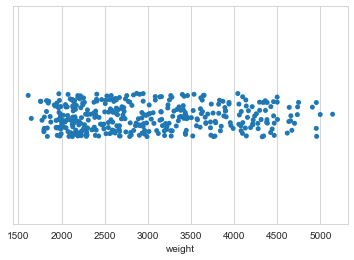

In [21]:
sns.stripplot(data=cars, x="weight")

<AxesSubplot:xlabel='weight', ylabel='origin'>

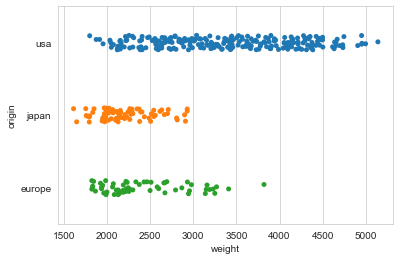

In [23]:
sns.stripplot(data=cars, x="weight", y="origin")

<AxesSubplot:xlabel='weight', ylabel='origin'>

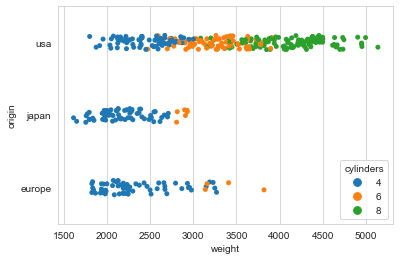

In [24]:
sns.stripplot(data=cars, x="weight", y="origin", hue="cylinders")

<AxesSubplot:xlabel='weight', ylabel='origin'>

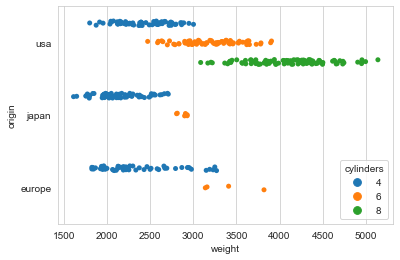

In [25]:
sns.stripplot(data=cars, x="weight", y="origin", hue="cylinders",
              dodge=True)

### Orientation

<AxesSubplot:xlabel='origin', ylabel='weight'>

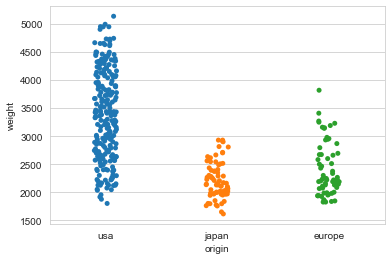

In [26]:
sns.stripplot(data=cars, x="origin", y="weight")

## Styling

In [27]:
sns.set_style("white")

### jitter

<AxesSubplot:xlabel='weight', ylabel='origin'>

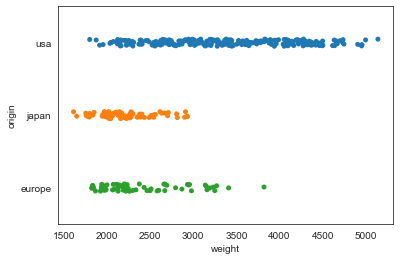

In [33]:
sns.stripplot(data=cars, x="weight", y="origin", jitter=0.05)

<AxesSubplot:xlabel='weight', ylabel='origin'>

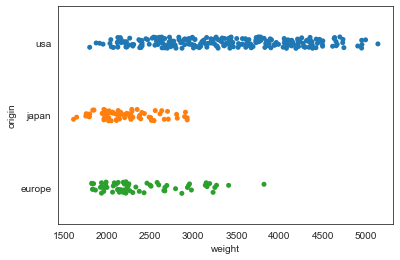

In [41]:
sns.stripplot(data=cars, x="weight", y="origin", jitter=0.08)

### alpha

In [42]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='weight', ylabel='origin'>

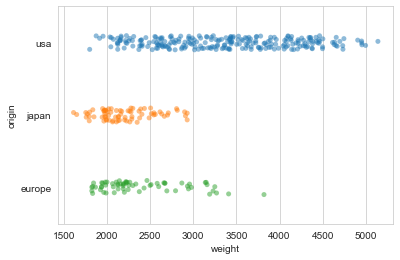

In [43]:
sns.stripplot(data=cars, x="weight", y="origin", alpha=0.5)

### size

<AxesSubplot:xlabel='weight', ylabel='origin'>

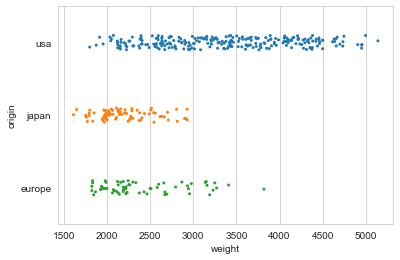

In [47]:
sns.stripplot(data=cars, x="weight", y="origin", 
              alpha=1, size=3 #default size=5
             )

### linewidth, edgecolor

<AxesSubplot:xlabel='weight', ylabel='origin'>

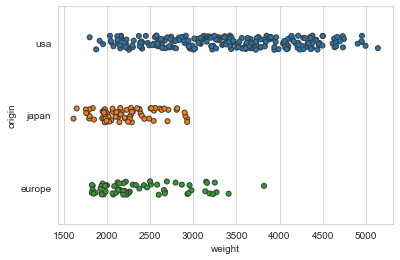

In [48]:
sns.stripplot(data=cars, x="weight", y="origin", linewidth=1)

<AxesSubplot:xlabel='weight', ylabel='origin'>

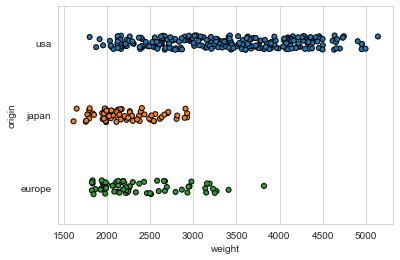

In [49]:
sns.stripplot(data=cars, x="weight", y="origin", linewidth=1, edgecolor="black")

### marker

Check the matplotlib scatter and the marker style docs for more styling of the markers themselves

<AxesSubplot:xlabel='weight', ylabel='origin'>

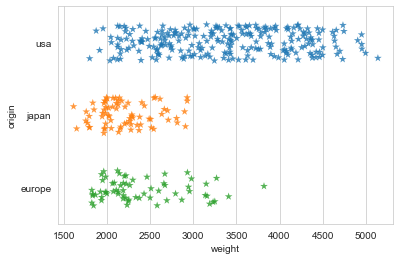

In [52]:
sns.stripplot(data=cars, x="weight", y="origin", 
              alpha=0.8, size=8, jitter=0.25, marker="*")

## Example Gallery

In [54]:
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", labelsize=14)

### Cylinders by hue

C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


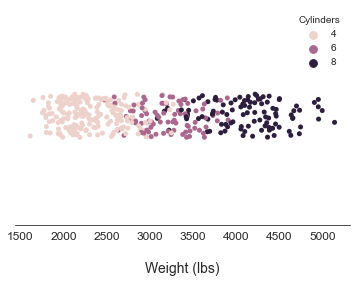

In [55]:
sns.set_style('white')
sns.stripplot(cars.weight, ['']*len(cars), hue=cars.cylinders, 
              palette=sns.cubehelix_palette(3));
sns.despine(left=True)
plt.xlabel('\nWeight (lbs)')
plt.legend(title='Cylinders', frameon=False);

### Newer models, vertical

In [56]:
sns.set_style('darkgrid')
cars['newer_model'] = [True if mod_year > 76 else False for mod_year in cars.model_year]

C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


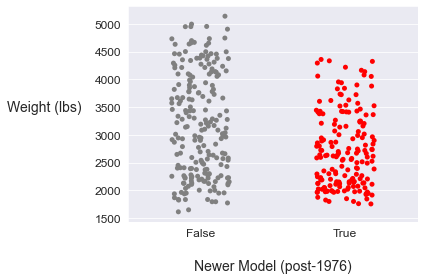

In [58]:
sns.stripplot(cars.newer_model, cars.weight, jitter=0.2, palette=['gray', 'red']);
plt.xlabel('\nNewer Model (post-1976)')
plt.ylabel('Weight (lbs)', rotation=0, labelpad=50)
plt.tight_layout();

### Low, medium, high MPG

In [59]:
cars['mpg_range'] = ['Low' if m < 19 else ('Medium' if m < 27 else 'High') for m in cars.mpg]

C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


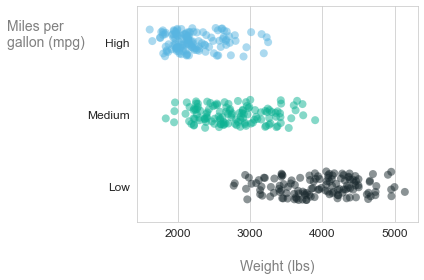

In [60]:
sns.set_style('whitegrid')
sns.stripplot(cars.weight, cars.mpg_range, 
              order=['High', 'Medium', 'Low'],
              jitter=0.2,
              palette=["#58b5e1", "#0db293", "#19282d"],
              alpha=0.5,
              size=8
             )
plt.xlabel('\nWeight (lbs)', color='gray')
plt.ylabel('Miles per\ngallon (mpg)', 
           rotation=0, 
           labelpad=80, 
           ha='left', 
           position=(-.1, .8),
           color='gray'
          )
plt.tight_layout();

### Company smileys

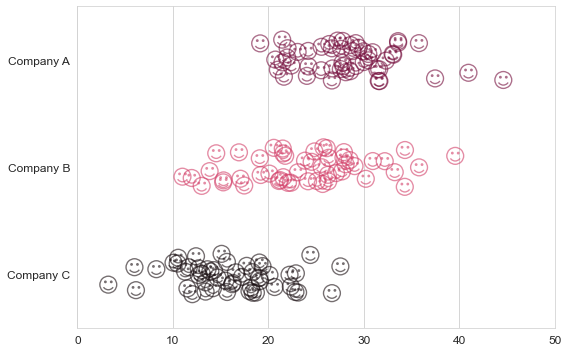

In [61]:
import random
random.seed(11)

points = 50
data = [random.gauss(28, 5) for _ in range(points)]
data.extend([random.gauss(20, 8) for _ in range(points)])
data.extend([random.gauss(15, 5) for _ in range(points)])
company = ['Company A']*points + ['Company B']*points + ['Company C']*points

plt.figure(figsize=(8,5))
sns.stripplot(x=data, y=company, 
              jitter=0.2, 
              alpha=0.6, 
              size=20, 
              marker=r'$☺$',
              palette=["#750e3d", "#d34069", "#190e11"]
             );
for pos in ['left', 'right', 'top', 'bottom']:
    plt.gca().spines[pos].set_edgecolor('lightgray')
plt.xticks([0, 10, 20, 30, 40, 50])
plt.tight_layout();

### Boxplot overlay

C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


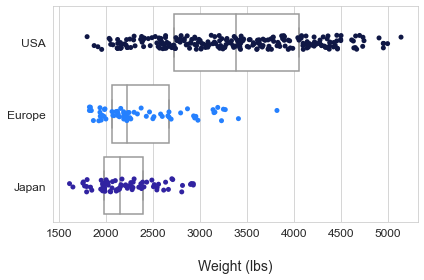

In [62]:
sns.boxplot(cars.weight, cars.origin, whis=0, color='white', fliersize=0, order=['usa', 'europe', 'japan'])
sns.stripplot(cars.weight, cars.origin, palette=["#0f1745", "#2580fe", "#3123a1"], order=['usa', 'europe', 'japan'])
plt.xlabel('\nWeight (lbs)')
plt.ylabel('')
plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();